In [151]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import *
import matplotlib.pyplot as plt
from keras import optimizers


In [152]:
def baseline_model_1(loss_func,opti_func,acti_func,no_nodes):
	# create model
	model = Sequential()
	model.add(Dense(no_nodes, input_dim=784, kernel_initializer='uniform', activation=acti_func))
	model.add(Dense(10, kernel_initializer='uniform', activation='softmax'))
	# Compile model
	model.compile(loss=loss_func, optimizer=opti_func, metrics=['accuracy'])
	return model

In [153]:
def baseline_model_2(loss_func,opti_func,acti_func,no_nodes):
    # create model
    model = Sequential()
    model.add(Dense(no_nodes, input_dim=784, kernel_initializer='uniform', activation=acti_func))
    model.add(Dense(no_nodes, kernel_initializer='uniform', activation=acti_func))
    model.add(Dense(10, kernel_initializer='uniform', activation='softmax'))
    # Compile model
    model.compile(loss=loss_func, optimizer=opti_func, metrics=['accuracy'])
    return model

In [154]:
def plot_stats(history):
    #accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    

In [155]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [156]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255


In [157]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/step - loss: 2.3031 - acc: 0.1063 - val_loss: 2.2819 - val_acc: 0.2716
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss: 2.2824 - acc: 0.2702 - val_loss: 2.2610 - val_acc: 0.3054
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 2.2619 - acc: 0.3063 - val_loss: 2.2374 - val_acc: 0.3823
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.2388 - acc: 0.3827 - val_loss: 2.2128 - val_acc: 0.4008
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.2145 - acc: 0.4007 - val_loss: 2.1880 - val_acc: 0.4487
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.1901 - acc: 0.4411 - val_loss: 2.1637 - val_acc: 0.4670
Epoch 7/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.1661 - acc: 0.4612 - val_loss: 2.1401 - val_acc

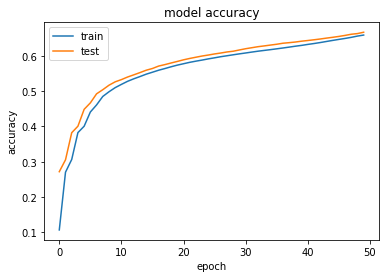

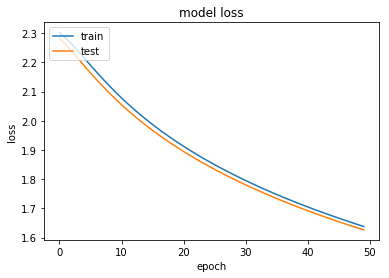

In [159]:
# Model description:
# 1 hidden layer - 15 nodes 
# Optimizer - adagrad
# Activation for hidden layers - sigmoid
# Batchsize = 60,000

model = baseline_model_1('categorical_crossentropy','adagrad','sigmoid',15)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=60000, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 61us/step - loss: 2.2092 - acc: 0.3710 - val_loss: 2.0918 - val_acc: 0.5510
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 2.0191 - acc: 0.5714 - val_loss: 1.9363 - val_acc: 0.6070
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 1.8849 - acc: 0.6238 - val_loss: 1.8230 - val_acc: 0.6579
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.7831 - acc: 0.6718 - val_loss: 1.7337 - val_acc: 0.7016
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 1.7012 - acc: 0.7110 - val_loss: 1.6600 - val_acc: 0.7302
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 1.6326 - acc: 0.7348 - val_loss: 1.5973 - val_acc: 0.7510
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 1.5734 - acc: 0.7532 - val_loss: 1.5425 - val_acc

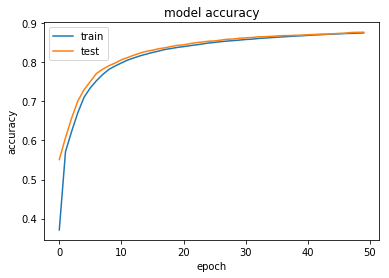

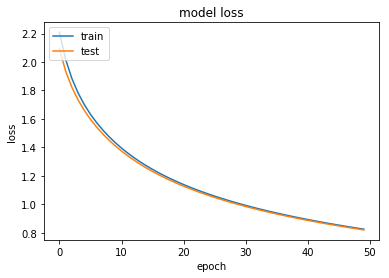

In [161]:
# Model description:
# 1 hidden layer - 15 nodes 
# Optimizer - adagrad
# Activation for hidden layers - sigmoid
# Mini batch size = 6000

model = baseline_model_1('categorical_crossentropy','adagrad','sigmoid',15)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 1.8197 - acc: 0.5740 - val_loss: 1.2968 - val_acc: 0.7852
Epoch 2/50
60000/60000 [==============================] - 3s 47us/step - loss: 1.0849 - acc: 0.8104 - val_loss: 0.8706 - val_acc: 0.8483
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.7867 - acc: 0.8507 - val_loss: 0.6796 - val_acc: 0.8659
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.6392 - acc: 0.8678 - val_loss: 0.5720 - val_acc: 0.8819
Epoch 5/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.5524 - acc: 0.8793 - val_loss: 0.5060 - val_acc: 0.8897
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.4956 - acc: 0.8868 - val_loss: 0.4602 - val_acc: 0.8962
Epoch 7/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.4557 - acc: 0.8921 - val_loss: 0.4273 - val_acc

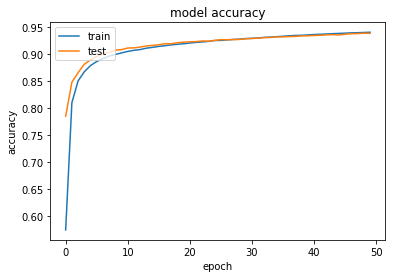

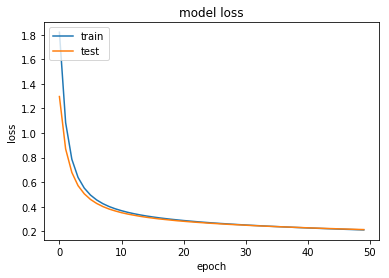

In [112]:
# Model description:
# 1 hidden layer - 200 nodes 
# Optimizer - adagrad
# Activation for hidden layers - sigmoid
# Mini batch size = 6000

model = baseline_model_1('categorical_crossentropy','adagrad','sigmoid',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 148us/step - loss: 2.2219 - acc: 0.3054 - val_loss: 1.8719 - val_acc: 0.5697
Epoch 2/50
60000/60000 [==============================] - 5s 86us/step - loss: 1.5475 - acc: 0.6203 - val_loss: 1.2158 - val_acc: 0.7194
Epoch 3/50
60000/60000 [==============================] - 5s 86us/step - loss: 1.0789 - acc: 0.7243 - val_loss: 0.9212 - val_acc: 0.7827
Epoch 4/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.8520 - acc: 0.7919 - val_loss: 0.7636 - val_acc: 0.8208
Epoch 5/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.7162 - acc: 0.8280 - val_loss: 0.6493 - val_acc: 0.8475
Epoch 6/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.6180 - acc: 0.8509 - val_loss: 0.5670 - val_acc: 0.8629
Epoch 7/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.5449 - acc: 0.8682 - val_loss: 0.5049 - val_ac

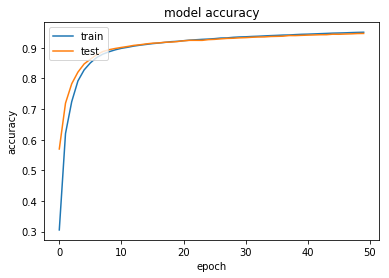

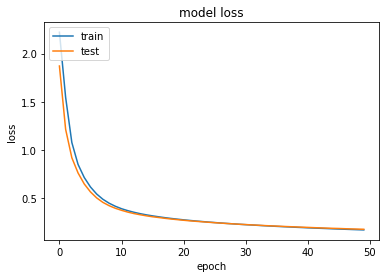

In [135]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - adagrad
# Activation for hidden layers - sigmoid
# Mini batch size = 6000

model = baseline_model_2('categorical_crossentropy','adagrad','sigmoid',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 126us/step - loss: 1.3769 - acc: 0.5376 - val_loss: 0.7032 - val_acc: 0.8009
Epoch 2/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.5749 - acc: 0.8407 - val_loss: 0.4416 - val_acc: 0.8858
Epoch 3/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.4197 - acc: 0.8855 - val_loss: 0.3785 - val_acc: 0.8929
Epoch 4/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.3639 - acc: 0.8982 - val_loss: 0.3306 - val_acc: 0.9092
Epoch 5/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.3261 - acc: 0.9080 - val_loss: 0.3086 - val_acc: 0.9137
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.3044 - acc: 0.9132 - val_loss: 0.2948 - val_acc: 0.9167
Epoch 7/50
60000/60000 [==============================] - 5s 92us/step - loss: 0.2879 - acc: 0.9176 - val_loss: 0.2791 - val_ac

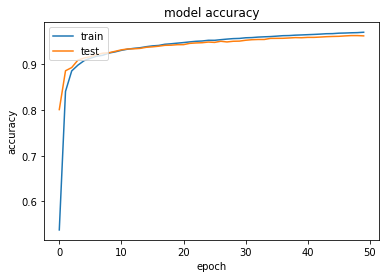

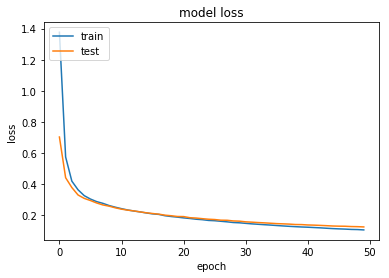

In [136]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - adagrad
# Activation for hidden layers - tanh
# Mini batch size = 6000

model = baseline_model_2('categorical_crossentropy','adagrad','tanh',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 141us/step - loss: 1.6302 - acc: 0.5020 - val_loss: 0.7402 - val_acc: 0.8175
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.6257 - acc: 0.8158 - val_loss: 0.4376 - val_acc: 0.8796
Epoch 3/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4434 - acc: 0.8625 - val_loss: 0.3663 - val_acc: 0.8998
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.3455 - acc: 0.9035 - val_loss: 0.3295 - val_acc: 0.9035
Epoch 5/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.3151 - acc: 0.9086 - val_loss: 0.2812 - val_acc: 0.9196
Epoch 6/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.2725 - acc: 0.9224 - val_loss: 0.2556 - val_acc: 0.9249
Epoch 7/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.2533 - acc: 0.9281 - val_loss: 0.2461 - val_ac

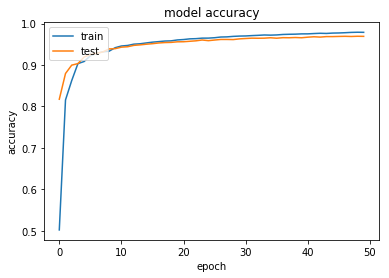

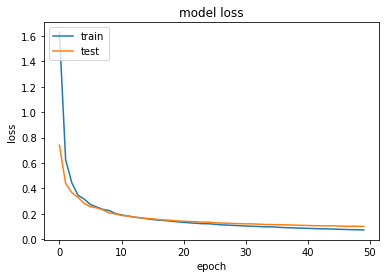

In [134]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - adagrad
# Activation for hidden layers - relu
# Mini batch size = 6000

model = baseline_model_2('categorical_crossentropy','adagrad','relu',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 121us/step - loss: 2.2980 - acc: 0.1537 - val_loss: 2.2934 - val_acc: 0.2417
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 2.2879 - acc: 0.3118 - val_loss: 2.2801 - val_acc: 0.4044
Epoch 3/50
60000/60000 [==============================] - 7s 113us/step - loss: 2.2727 - acc: 0.4444 - val_loss: 2.2618 - val_acc: 0.4966
Epoch 4/50
60000/60000 [==============================] - 5s 84us/step - loss: 2.2516 - acc: 0.5018 - val_loss: 2.2355 - val_acc: 0.5182
Epoch 5/50
60000/60000 [==============================] - 5s 84us/step - loss: 2.2203 - acc: 0.5097 - val_loss: 2.1956 - val_acc: 0.5149
Epoch 6/50
60000/60000 [==============================] - 5s 86us/step - loss: 2.1720 - acc: 0.5021 - val_loss: 2.1331 - val_acc: 0.5073
Epoch 7/50
60000/60000 [==============================] - 5s 81us/step - loss: 2.0957 - acc: 0.5014 - val_loss: 2.0340 - val_a

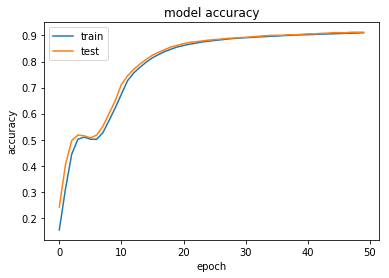

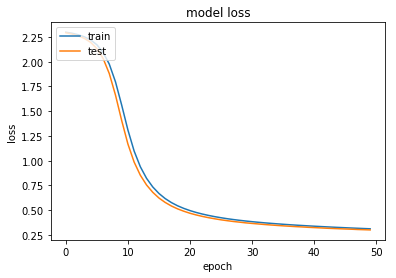

In [146]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - sgd with momentum 0.9
# Activation for hidden layers - relu
# Mibi batch size = 6000

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model = baseline_model_2('categorical_crossentropy',sgd,'relu',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 169us/step - loss: 2.2066 - acc: 0.4598 - val_loss: 1.9138 - val_acc: 0.6579
Epoch 2/50
60000/60000 [==============================] - 6s 92us/step - loss: 1.4995 - acc: 0.6281 - val_loss: 1.0352 - val_acc: 0.7352
Epoch 3/50
60000/60000 [==============================] - 6s 92us/step - loss: 1.0607 - acc: 0.6446 - val_loss: 0.7038 - val_acc: 0.8063
Epoch 4/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.7467 - acc: 0.7514 - val_loss: 0.7676 - val_acc: 0.7287
Epoch 5/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.5880 - acc: 0.8184 - val_loss: 0.5343 - val_acc: 0.8275
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.5175 - acc: 0.8327 - val_loss: 0.4489 - val_acc: 0.8611
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.4742 - acc: 0.8451 - val_loss: 0.3993 - val_a

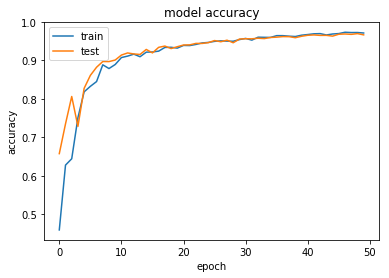

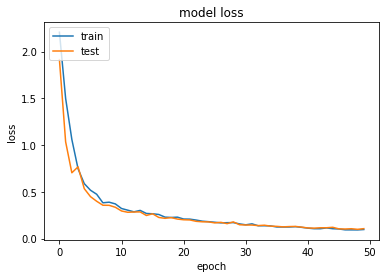

In [147]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - adadelta
# Activation for hidden layers - relu
# Mini batch size = 6000


model = baseline_model_2('categorical_crossentropy','adadelta','relu',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 160us/step - loss: 2.1254 - acc: 0.5295 - val_loss: 1.7468 - val_acc: 0.7262
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 1.3047 - acc: 0.7574 - val_loss: 0.8085 - val_acc: 0.8121
Epoch 3/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.6420 - acc: 0.8275 - val_loss: 0.4860 - val_acc: 0.8613
Epoch 4/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.4415 - acc: 0.8716 - val_loss: 0.3805 - val_acc: 0.8918
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.3606 - acc: 0.8953 - val_loss: 0.3265 - val_acc: 0.9047
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.3202 - acc: 0.9075 - val_loss: 0.2994 - val_acc: 0.9132
Epoch 7/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.2944 - acc: 0.9154 - val_loss: 0.2792 - val_a

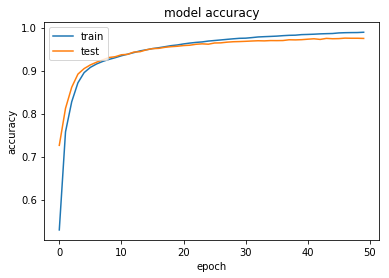

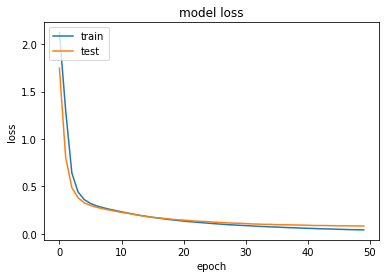

In [148]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - adam
# Activation for hidden layers - relu
# Mini batch size = 6000


model = baseline_model_2('categorical_crossentropy','adam','relu',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=6000, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 197us/step - loss: 0.3190 - acc: 0.9027 - val_loss: 0.1606 - val_acc: 0.9507
Epoch 2/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.1430 - acc: 0.9575 - val_loss: 0.1241 - val_acc: 0.9632
Epoch 3/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.1104 - acc: 0.9672 - val_loss: 0.1069 - val_acc: 0.9666
Epoch 4/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0916 - acc: 0.9731 - val_loss: 0.0953 - val_acc: 0.9701
Epoch 5/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0786 - acc: 0.9770 - val_loss: 0.0883 - val_acc: 0.9735
Epoch 6/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.0681 - acc: 0.9804 - val_loss: 0.0823 - val_acc: 0.9752
Epoch 7/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.0607 - acc: 0.9827 - val_loss: 0.0804 -

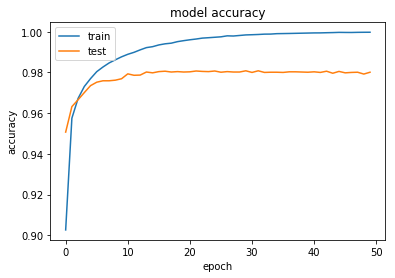

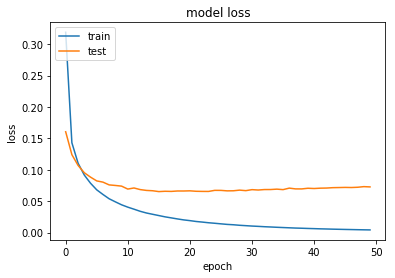

In [137]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - adagrad
# Activation for hidden layers - relu
# mini batch size = 200

model = baseline_model_2('categorical_crossentropy','adagrad','relu',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.4360 - acc: 0.8843 - val_loss: 0.2125 - val_acc: 0.9373 1s - loss: 0.4564 
Epoch 2/50
60000/60000 [==============================] - 10s 174us/step - loss: 0.1721 - acc: 0.9488 - val_loss: 0.1324 - val_acc: 0.9589
Epoch 3/50
60000/60000 [==============================] - 11s 176us/step - loss: 0.1166 - acc: 0.9653 - val_loss: 0.1119 - val_acc: 0.9647
Epoch 4/50
60000/60000 [==============================] - 11s 181us/step - loss: 0.0836 - acc: 0.9751 - val_loss: 0.0872 - val_acc: 0.9727
Epoch 5/50
60000/60000 [==============================] - 10s 173us/step - loss: 0.0636 - acc: 0.9810 - val_loss: 0.0824 - val_acc: 0.9744
Epoch 6/50
60000/60000 [==============================] - 11s 176us/step - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0695 - val_acc: 0.9781
Epoch 7/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.0387 - acc: 0.

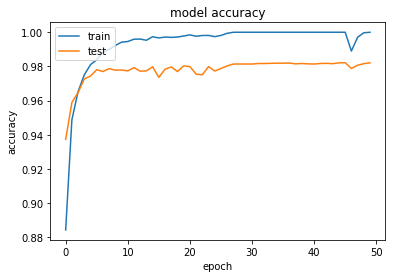

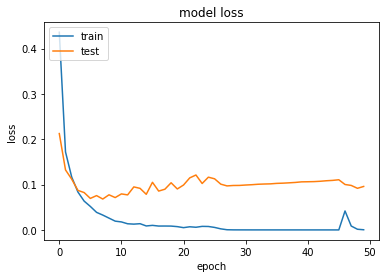

In [149]:
# Model description:
# 2 hidden layers - 200 nodes each
# Optimizer - adam
# Activation for hidden layers - relu
# mini batch size = 200

model = baseline_model_2('categorical_crossentropy','adam','relu',200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 34s 567us/step - loss: 0.2978 - acc: 0.9163 - val_loss: 0.1214 - val_acc: 0.9621
Epoch 2/50
60000/60000 [==============================] - 29s 489us/step - loss: 0.1018 - acc: 0.9698 - val_loss: 0.0820 - val_acc: 0.9740
Epoch 3/50
60000/60000 [==============================] - 30s 502us/step - loss: 0.0629 - acc: 0.9812 - val_loss: 0.0773 - val_acc: 0.9752
Epoch 4/50
60000/60000 [==============================] - 30s 507us/step - loss: 0.0447 - acc: 0.9858 - val_loss: 0.0632 - val_acc: 0.9800
Epoch 5/50
60000/60000 [==============================] - 29s 490us/step - loss: 0.0317 - acc: 0.9896 - val_loss: 0.0636 - val_acc: 0.9806
Epoch 6/50
60000/60000 [==============================] - 31s 515us/step - loss: 0.0249 - acc: 0.9916 - val_loss: 0.0670 - val_acc: 0.9790
Epoch 7/50
60000/60000 [==============================] - 31s 517us/step - loss: 0.0194 - acc: 0.9937 - val_loss: 0.

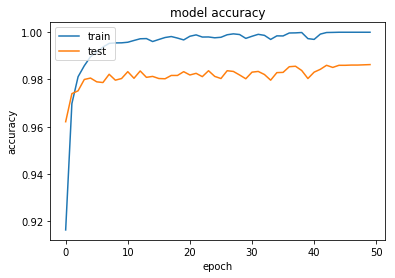

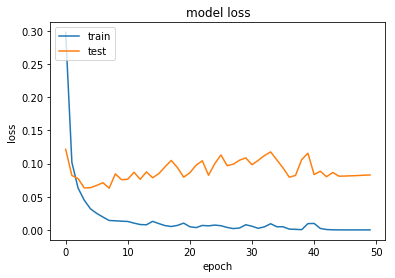

In [158]:
# Model description:
# 2 hidden layers - 500 nodes each
# Optimizer - adam
# Activation for hidden layers - relu
# mini batch size = 200

# maximum accuracy model, but takes a long time to run due to the large number of nodes

model = baseline_model_2('categorical_crossentropy','adam','relu',500)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

plot_stats(history)